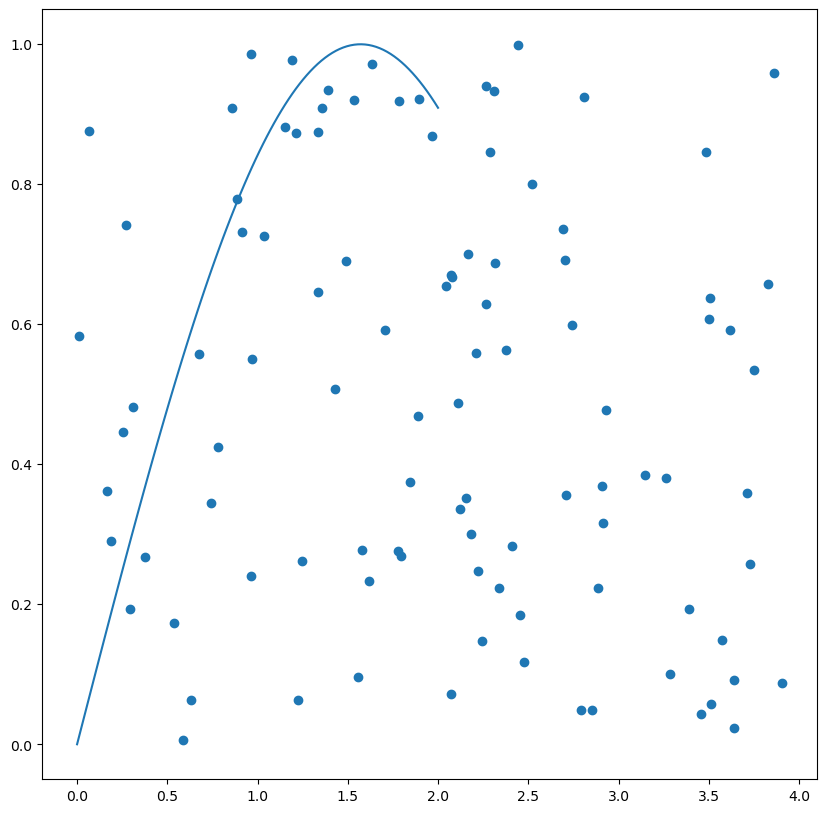

In [85]:
import matplotlib.pyplot as plt
import numpy as np

a=0
b=2

def funcion(z):
    return abs(math.sin(z))

fun = funcion    

def integra_mc(fun, a, b, num_puntos=100):
    
    
    # generar puntos--------------------
    x = np.random.rand(num_puntos)*b*2
    y = np.random.rand(num_puntos)
    
    #----------------------------------
    
    
    ###generar valores de funcion
    z = np.linspace(a,b,num_puntos)
    
    
    
    ## valores de puntos
    plt.figure(figsize=(10,10))
    plt.scatter(x,y)
    plt.plot(z, [funcion(i) for i in z])
    plt.show()
    
integra_mc(funcion,a,b)
    
    